In [1]:
import torch.optim as optim
import gymnasium as gym

from simple_ppo import PPO
from simple_ppo.policy import ContinuMlpPolicy
from simple_ppo.utils import evaluate, plot

In [2]:
policy = ContinuMlpPolicy(state_dim=11, action_dim=1)
optimizer = optim.Adam(policy.parameters(), lr=0.0003)

In [3]:
env = gym.make('InvertedDoublePendulum-v4', render_mode=None)
env_eval = gym.make('InvertedDoublePendulum-v4', render_mode=None)

agent = PPO(policy, optimizer, env, env_eval,
            gamma=0.99, gae_lambda=0.95, n_step=2048, batch_size=64, n_epochs=16,
            clip_eps=0.1, vf_coef=1.0, ent_coef=0.0, max_grad_norm=1.0,
            eval_num=4)

log = agent.train(total_timesteps=100000)

env.close()
env_eval.close()

| timestep   2048 | policy  -34.475 | value  +26.390 | entropy   +0.680 | reward   +68.7 |
| timestep   4096 | policy  -26.231 | value  +22.527 | entropy   +0.602 | reward   +87.1 |
| timestep   6144 | policy  -19.523 | value  +17.874 | entropy   +0.520 | reward   +94.3 |
| timestep   8192 | policy  -15.010 | value  +15.116 | entropy   +0.450 | reward   +85.0 |
| timestep  10240 | policy  -12.426 | value  +12.978 | entropy   +0.378 | reward  +135.9 |
| timestep  12288 | policy  -12.855 | value  +13.867 | entropy   +0.301 | reward  +110.8 |
| timestep  14336 | policy  -13.890 | value  +15.695 | entropy   +0.214 | reward  +136.5 |
| timestep  16384 | policy  -15.145 | value  +16.626 | entropy   +0.134 | reward  +217.6 |
| timestep  18432 | policy  -17.747 | value  +18.642 | entropy   +0.061 | reward  +257.6 |
| timestep  20480 | policy  -24.820 | value  +25.174 | entropy   -0.019 | reward  +292.4 |
| timestep  22528 | policy  -25.173 | value  +26.638 | entropy   -0.098 | reward  +276.1 |

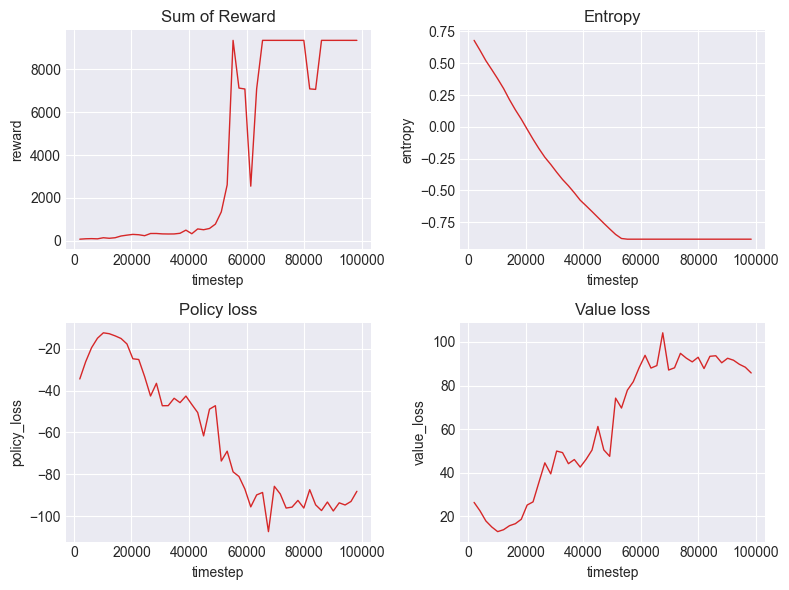

In [4]:
plot(log)

In [8]:
env = gym.make('InvertedDoublePendulum-v4', render_mode=None)
mean, std = evaluate(policy, env, eval_num=32)
env.close()

print('mean : %f    std : %f'%(mean, std))

mean : 9359.599609    std : 2.828427


In [15]:
env = gym.make('InvertedDoublePendulum-v4', render_mode='human')
evaluate(policy, env, eval_num=1, deterministic=False)
env.close()